In [1]:
import pandas as pd

def read_data(fname, result):
    df = pd.read_csv(fname)
    df = df.groupby(by="radius").mean()
    if "tv1" in df:
        result.append(df["tv1"])
    else:
        result.append(df["tv"])
    if "tv3" in df:
        result.append(df["tv3"])


In [2]:
import matplotlib.pyplot as plt

display_names = ["CanDE", "Oracle", "FairNN (L=ANNS)", "FairNN (L=50)", "FairNN (L=100)"]
markers = ["o", "^", "2", "x", "d"]
linestyles = [(0, ()), (0, (1, 1)), (0, (5, 5)), (0, (3, 5, 1, 5)), (0, (5, 1))]

def plot_result(dataset, result, savepath):
    f = plt.figure()
    ax = plt.gca()
    params = {'legend.fontsize': 22,
            'axes.labelsize': 22,
            'axes.titlesize':22,
            'xtick.labelsize':22,
            'ytick.labelsize':22}
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,3))

    for line_num in range(5):
        ax.plot(result[line_num].index, result[line_num], linestyle=linestyles[line_num], marker=markers[line_num], 
                markersize=8, linewidth=3, label=display_names[line_num])
    
    #ax.set_ylim((0, 0.8))
    #ax.plot(x_bins, mres[2], label="TRI")
    ax.set_xlabel("NN Radius",fontsize=22)
    ax.set_ylabel("Total Variation",fontsize=22)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_title(dataset)
    ax.legend(loc="upper left")

    #plt.savefig(savepath, bbox_inches="tight")


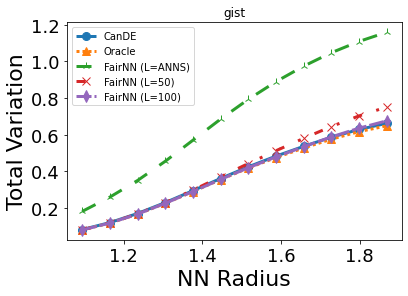

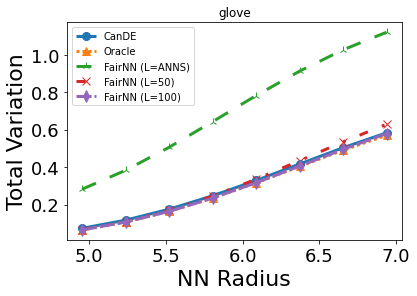

In [3]:
files = ["CanDE_new.csv", "fairnn_-1.csv", "fairnn_50.csv", "fairnn_100.csv"]

datasets = ["gist",  "glove"]

exp_path = "/media/mydrive/distribution/ann-codes/in-memory/EXPERIMENTS/"

import os
for dataset in datasets:
    result = []
    cur_path = os.path.join(exp_path, dataset, "fair_nn")
    for fname in files:
        read_data(os.path.join(cur_path, fname), result)
    #print(dataset, result)
    plot_result(dataset, result, os.path.join(exp_path, "plot2/{}_fnn_new_1000000.pdf".format(dataset)))


In [ ]:
result = []
dataset = "glove"
cur_path = os.path.join(exp_path, dataset, "fair_nn")
for fname in files:
    read_data(os.path.join(cur_path, fname), result)
print(result)

[radius
5.20836     0.253506
5.72919     0.583956
6.25003     1.012237
6.77086     1.380162
7.29170     1.608921
7.81253     1.730720
8.33337     1.793643
8.85420     1.820330
9.37504     1.830602
9.89587     1.835142
10.41670    1.837365
10.93750    1.838478
11.45840    1.839043
11.97920    1.839321
12.50010    1.839451
Name: tv1, dtype: float64, radius
5.20836     0.252787
5.72919     0.581651
6.25003     1.009681
6.77086     1.377617
7.29170     1.607001
7.81253     1.729450
8.33337     1.792937
8.85420     1.819867
9.37504     1.830147
9.89587     1.834690
10.41670    1.836883
10.93750    1.837995
11.45840    1.838509
11.97920    1.838781
12.50010    1.838886
Name: tv3, dtype: float64, radius
5.20836     0.320641
5.72919     0.677550
6.25003     1.105546
6.77086     1.454706
7.29170     1.659614
7.81253     1.760130
8.33337     1.808977
8.85420     1.830386
9.37504     1.839346
9.89587     1.843431
10.41670    1.845453
10.93750    1.846479
11.45840    1.846977
11.97920    1.847195
